<a href="https://colab.research.google.com/github/SH22Hwang/GNU_AugumentedIntelligenceLab/blob/main/%EC%97%84%EC%A7%80/5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.linear_model import LinearRegression

In [2]:
# 닥스훈트
dach_length = [75, 77, 83, 81, 73, 99, 72, 83]
dach_height = [24, 29, 19, 32, 21, 22, 19, 34]

# 사모예드
samo_length = [76, 78, 82, 88, 76, 83, 81, 89]
samo_height = [55, 58, 53, 54, 61, 52, 57, 64]

# 말티즈
mal_length = [35, 39, 38, 41, 30, 57, 41, 35]
mal_height = [23, 26, 19, 30, 21, 24, 28, 20]

In [3]:
# 5.1 레이블링
d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data))

s_data = np.column_stack((samo_length, samo_height))
s_label = np.ones(len(s_data))

m_data = np.column_stack((mal_length, mal_height))
m_label = s_label+1

print('닥스훈트(0) :', d_data)
print('============================')
print('사모예드(1) :', s_data)
print('============================')
print('말티즈(2) :', m_data)
print('============================')

닥스훈트(0) : [[75 24]
 [77 29]
 [83 19]
 [81 32]
 [73 21]
 [99 22]
 [72 19]
 [83 34]]
사모예드(1) : [[76 55]
 [78 58]
 [82 53]
 [88 54]
 [76 61]
 [83 52]
 [81 57]
 [89 64]]
말티즈(2) : [[35 23]
 [39 26]
 [38 19]
 [41 30]
 [30 21]
 [57 24]
 [41 28]
 [35 20]]


In [4]:
# 5.2
from sklearn.metrics import confusion_matrix

dogs = np.concatenate((d_data, s_data, m_data))
labels = np.concatenate((d_label, s_label, m_label))

dog_classes = {0: '닥스훈트', 1: '사모예드', 2: '말티즈'}

dog_data = []
for i in range(len(dach_length)):
  dog_data.append([dach_length[i], dach_height[i]])

for i in range(len(dach_length)):
  dog_data.append([samo_length[i], samo_height[i]])

for i in range(len(dach_length)):
  dog_data.append([mal_length[i], mal_height[i]])  

# dog_data

k = 3
knn = KNeighborsClassifier(n_neighbors = k)

# y_pred_all = knn.predict(dog_data, dog_data)

conf_mat = confusion_matrix(dog_data)
conf_mat

TypeError: ignored

In [5]:
# 5.3
# data 항목
newdata1 = [[58, 30]]
newdata2 = [[80, 26]]
newdata3 = [[80, 41]]
newdata4 = [[75, 55]]

# 결과
print('A 데이터 분류결과')
for k in range(3, 8, 2):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(dogs, labels)
  y_pred = knn.predict(newdata1)
  print('A [[58, 30]] : n_neighbors가', k, '일 때 :', dog_classes[y_pred[0]])
print('===============================================')

print('B 데이터 분류결과')
for k in range(3, 8, 2):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(dogs, labels)
  y_pred = knn.predict(newdata2)
  print('B [[80, 26]] : n_neighbors가', k, '일 때 :', dog_classes[y_pred[0]])
print('===============================================')

print('C 데이터 분류결과')
for k in range(3, 8, 2):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(dogs, labels)
  y_pred = knn.predict(newdata3)
  print('C [[80, 41]] : n_neighbors가', k, '일 때 :', dog_classes[y_pred[0]])
print('===============================================')

print('D 데이터 분류결과')
for k in range(3, 8, 2):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(dogs, labels)
  y_pred = knn.predict(newdata4)
  print('D [[75, 55]] : n_neighbors가', k, '일 때 :', dog_classes[y_pred[0]])
print('===============================================')

A 데이터 분류결과
A [[58, 30]] : n_neighbors가 3 일 때 : 말티즈
A [[58, 30]] : n_neighbors가 5 일 때 : 말티즈
A [[58, 30]] : n_neighbors가 7 일 때 : 닥스훈트
B 데이터 분류결과
B [[80, 26]] : n_neighbors가 3 일 때 : 닥스훈트
B [[80, 26]] : n_neighbors가 5 일 때 : 닥스훈트
B [[80, 26]] : n_neighbors가 7 일 때 : 닥스훈트
C 데이터 분류결과
C [[80, 41]] : n_neighbors가 3 일 때 : 닥스훈트
C [[80, 41]] : n_neighbors가 5 일 때 : 닥스훈트
C [[80, 41]] : n_neighbors가 7 일 때 : 사모예드
D 데이터 분류결과
D [[75, 55]] : n_neighbors가 3 일 때 : 사모예드
D [[75, 55]] : n_neighbors가 5 일 때 : 사모예드
D [[75, 55]] : n_neighbors가 7 일 때 : 사모예드


In [6]:
# 5.4 k 값에 영향을 받지 않는 데이터

## 전체적으로 
# 닥스훈트는 길이가 길고 높이는 낮은 편 => ↑ ↓
# 사모예드는 길이가 길고 높이도 긴 편 => ↑ ↑
# 말티즈는 길이가 짧고 높이가 낮은 편 => ↓ ↓

## answer
# B [80, 26] => 길이가 길고 높이가 낮은 편 => ↑ ↓
# D [75, 55] => 길이가 길고 높이도 긴 편 => ↑ ↑

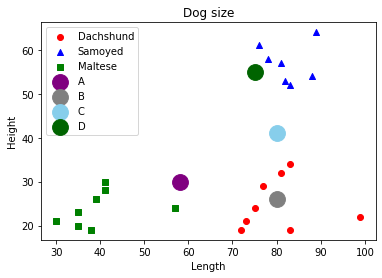

In [7]:
# 5.5
## 기존 데이터
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(samo_length, samo_height, c='blue', marker='^', label='Samoyed')
plt.scatter(mal_length, mal_height, c='green', marker='s', label='Maltese')

## 새로운 데이터
plt.scatter(newdata1[0][0:1], newdata1[0][1:2], s=250, c='purple', label='A')
plt.scatter(newdata2[0][0:1], newdata2[0][1:2], s=250, c='grey', label='B')
plt.scatter(newdata3[0][0:1], newdata3[0][1:2], s=250, c='skyblue', label='C')
plt.scatter(newdata4[0][0:1], newdata4[0][1:2], s=250, c='darkgreen', label='D')

## plt로 나타내기
plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Dog size')
plt.legend(loc='upper left')

plt.show()

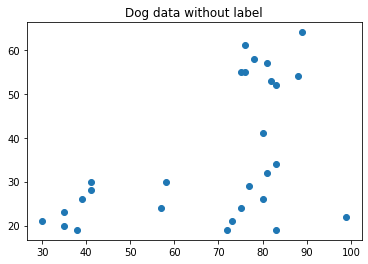

In [8]:
# 5.6.1
newdata_length = [58, 80, 80, 75]
newdata_height = [30, 26, 41, 55]

dog_length = np.array(dach_length + samo_length + mal_length + newdata_length)
dog_height = np.array(dach_height + samo_height + mal_height + newdata_height)

dog_data = np.column_stack((dog_length, dog_height))

plt.title("Dog data without label")
plt.scatter(dog_length, dog_height)

In [10]:
# 5.6 k-평균 알고리즘 적용
def kmeans_predict_plot(X, k):
  model = cluster.KMeans(n_clusters=k)
  model.fit(X)
  labels = model.predict(X)
  colors = np.array(['red', 'green', 'blue', 'magenta'])
  plt.suptitle('k-Means clustering, k={}'.format(k))
  plt.scatter(X[:, 0], X[:, 1], color=colors[labels])

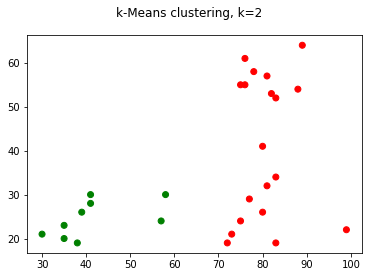

In [11]:
kmeans_predict_plot(dog_data, k=2)

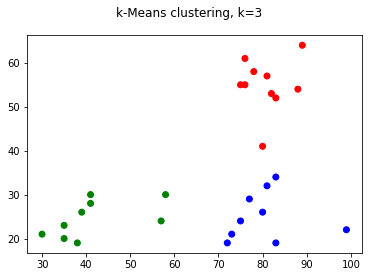

In [12]:
kmeans_predict_plot(dog_data, k=3)

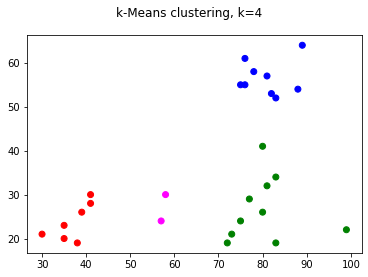

In [13]:
kmeans_predict_plot(dog_data, k=4)